<a href="https://colab.research.google.com/github/mwierciszewska/colab/blob/main/Feature_Extraction_from_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using MobileNet V2 for image detection - food photo database

Downloading data - food_vision

In [1]:
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-02-18 18:41:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.207, 108.177.97.207, 108.177.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  26.2MB/s    in 7.1s    

2025-02-18 18:41:45 (22.5 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Preprocessing data

In [3]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

Dawnload the pretrained model and save it to Sequental model

In [5]:
mobilenet_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/2"

In [6]:
import tf_keras
def create_model(model_url, num_classes):

  feature_extractor_layer = hub.KerasLayer(model_url, trainable=False, input_shape=IMAGE_SHAPE+ (3,), name='feature_extraction_layer')

  model = tf_keras.Sequential()
  model.add(feature_extractor_layer)
  model.add(tf_keras.layers.Dense(num_classes, activation='softmax', name='output_layer'))

  return model

Create model

In [7]:
mobilenet_model = create_model(mobilenet_url, num_classes=train_data_10_percent.num_classes)

In [12]:
mobilenet_model.compile(loss='categorical_crossentropy',
                        optimizer='Adam',
                        metrics=['accuracy'])

Fit the model

In [13]:
history = mobilenet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data)
                                  )

Epoch 1/5
24/24 [==============================] - 81s 3s/step - loss: 1.8075 - accuracy: 0.3853 - val_loss: 1.2408 - val_accuracy: 0.6424
Epoch 2/5
24/24 [==============================] - 71s 3s/step - loss: 0.9818 - accuracy: 0.7307 - val_loss: 0.8594 - val_accuracy: 0.7460
Epoch 3/5
24/24 [==============================] - 97s 4s/step - loss: 0.6929 - accuracy: 0.8227 - val_loss: 0.7354 - val_accuracy: 0.7724
Epoch 4/5
24/24 [==============================] - 98s 4s/step - loss: 0.5615 - accuracy: 0.8573 - val_loss: 0.6733 - val_accuracy: 0.7920
Epoch 5/5
24/24 [==============================] - 69s 3s/step - loss: 0.4524 - accuracy: 0.9013 - val_loss: 0.6568 - val_accuracy: 0.7864


Ploting loss curves

In [14]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

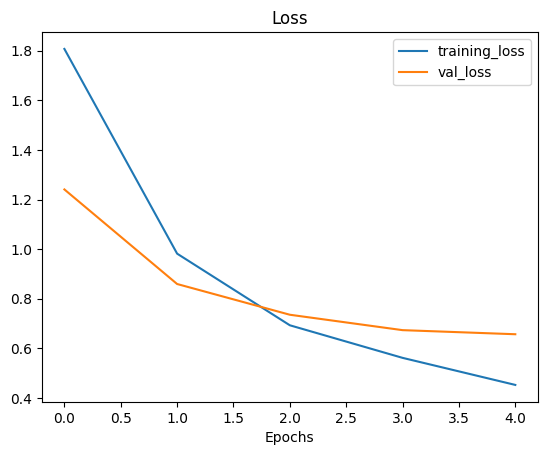

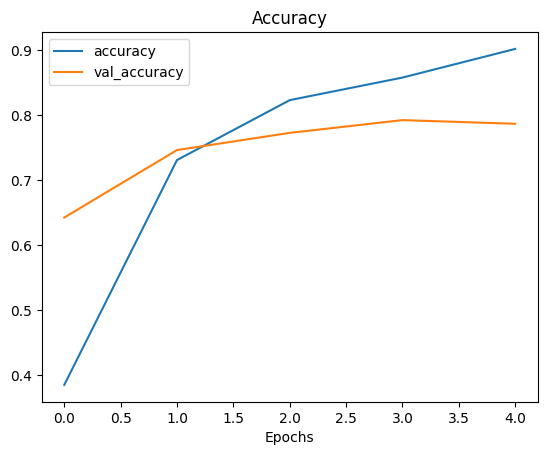

In [15]:
plot_loss_curves(history)

In [16]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              2257984   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


Taking random image of steak from goole

In [17]:
# View our example image
!wget https://www.thescottishsun.co.uk/wp-content/uploads/sites/2/2023/02/delicious-cooked-beef-rump-steak-727598068.jpg?strip=all&quality=100&w=1920&h=1080&crop=1


--2025-02-18 18:59:37--  https://www.thescottishsun.co.uk/wp-content/uploads/sites/2/2023/02/delicious-cooked-beef-rump-steak-727598068.jpg?strip=all
Resolving www.thescottishsun.co.uk (www.thescottishsun.co.uk)... 13.35.166.27, 13.35.166.60, 13.35.166.107, ...
Connecting to www.thescottishsun.co.uk (www.thescottishsun.co.uk)|13.35.166.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2507679 (2.4M) [image/jpeg]
Saving to: ‘delicious-cooked-beef-rump-steak-727598068.jpg?strip=all’

delicious-cooked-be 100%[===================>]   2.39M  12.2MB/s    in 0.2s    

2025-02-18 18:59:38 (12.2 MB/s) - ‘delicious-cooked-beef-rump-steak-727598068.jpg?strip=all’ saved [2507679/2507679]



In [19]:
import matplotlib.image as mpimg
import random

In [24]:
file_name = "delicious-cooked-beef-rump-steak-727598068.jpg?strip=all"

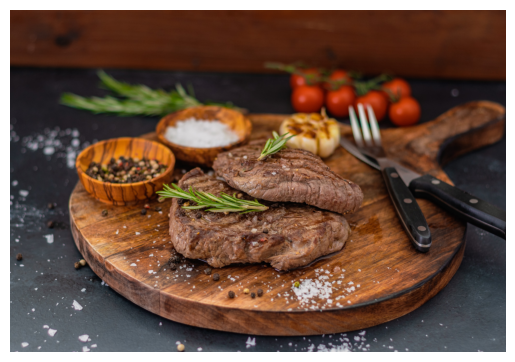

In [26]:
steak = mpimg.imread(file_name)
plt.imshow(steak)
plt.axis(False);

In [22]:
steak.shape

(2828, 4096, 3)

Prepare image for using in the model

In [31]:
def load_and_prepare_img(file_name, img_shape=224):

  #read the image
  img = tf.io.read_file(file_name)

  #decode the image
  img = tf.image.decode_image(img, channels=3)

  #resize the image
  img = tf.image.resize(img, size= [img_shape, img_shape])

  #rescale the image
  img = img/255.0
  return img

In [40]:
steak_img = load_and_prepare_img(file_name=file_name)

In [41]:
steak_img.shape

TensorShape([224, 224, 3])

In [42]:
# Add an extra axis
print(f"Shape before new dimension: {steak_img.shape}")
steak_img = tf.expand_dims(steak_img, axis=0) # add an extra dimension at axis 0

print(f"Shape after new dimension: {steak_img.shape}")
steak_img

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.30588236, 0.12941177, 0.05490196],
         [0.3137255 , 0.13725491, 0.0627451 ],
         [0.3262255 , 0.1497549 , 0.0752451 ],
         ...,
         [0.29093137, 0.12622549, 0.07132353],
         [0.297076  , 0.13237011, 0.06962502],
         [0.3019608 , 0.13333334, 0.07058824]],

        [[0.31311274, 0.13272059, 0.06997549],
         [0.30980393, 0.12941177, 0.06666667],
         [0.31460083, 0.13420868, 0.07146358],
         ...,
         [0.28715053, 0.12244466, 0.0675427 ],
         [0.2901961 , 0.1254902 , 0.0627451 ],
         [0.297426  , 0.12879854, 0.06605344]],

        [[0.30719537, 0.12680323, 0.06405813],
         [0.31004903, 0.12965687, 0.06691176],
         [0.31059176, 0.13019958, 0.06745449],
         ...,
         [0.2952024 , 0.13049652, 0.07510436],
         [0.2975136 , 0.13280772, 0.07006261],
         [0.30089182, 0.13226438, 0.06951928]],

        ...,

        [[0.41724437, 0.4525385 , 

In [46]:
pred = mobilenet_model.predict(steak_img)

1/1 [==============================] - 0s 35ms/step


Get the class names for our dataset and check the prediction

In [45]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


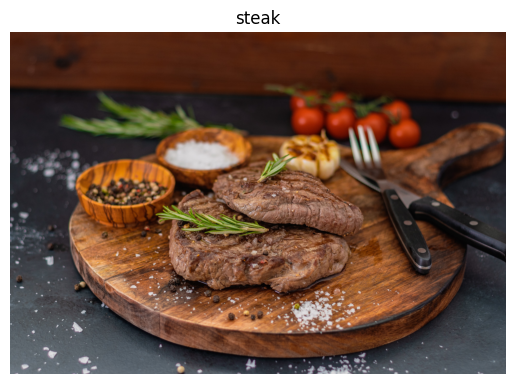

In [49]:
pred_class = class_names[pred.argmax()]
plt.imshow(steak)
plt.title(pred_class)
plt.axis(False);